#Unicorn Investors  want to make an investement in a new form of transportation - Jet rail. Jet Rail uses Jet compulsion  technology to run  rails and move people at a high speed . The ivestment would only make sense, if they got more than 1 million monthly users within 18 months. In order to help Unicorn Venture in their decision, you need t0 forecast the traffic on JetRail for next 7 months.


In [ ]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Loading the data
df = pd.read_csv('Train_SU63ISt.csv')




In [ ]:
# viewing the first 5 values od dataset
df.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [ ]:
#BASIC EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


In [ ]:
#Convering DateTime column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'], format='%d-%m-%Y %H:%M', errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ID        18288 non-null  int64         
 1   Datetime  18288 non-null  datetime64[ns]
 2   Count     18288 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.8 KB


In [ ]:
df.describe()

,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [ ]:
# Extracting Date column from DateTime column
df['Date'] = df['Datetime'].dt.date
df['year'] =df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day']= df['Datetime'].dt.day
df['hour']= df['Datetime'].dt.hour
df.head()


,ID,Datetime,Count,Date
0,0,2012-08-25 00:00:00,8,2012-08-25
1,1,2012-08-25 01:00:00,2,2012-08-25
2,2,2012-08-25 02:00:00,6,2012-08-25
3,3,2012-08-25 03:00:00,2,2012-08-25
4,4,2012-08-25 04:00:00,2,2012-08-25


In [ ]:
for i in df:
  df['year']= df.Datetime.dt.year
  df['month']= df.Datetime.dt.month
  df['day'] = df.Datetime.dt.day
  df['hour'] = df.Datetime.dt.hour

In [ ]:
df.head()

,ID,Datetime,Count,year,month,day,hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [ ]:
df['day of week'] = df['Datetime'].dt.dayofweek
temp= df['Datetime']

In [ ]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0


In [ ]:
temp2 = df['Datetime'].apply(applyer)
df['weekend'] = temp2

In [ ]:
df.head()

,ID,Datetime,Count,year,month,day,hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [ ]:
df = df.set_index(['Datetime'])

In [ ]:
df = df.drop('ID', axis =1)

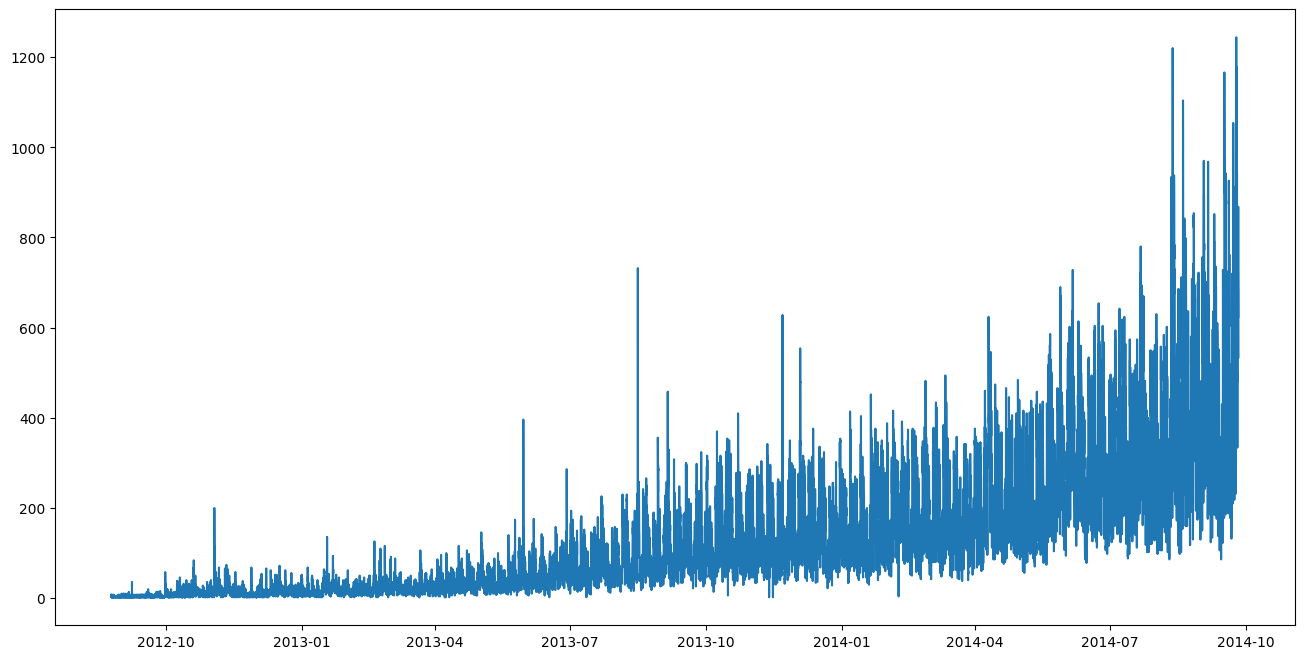

In [ ]:
ts = df['Count']
plt.figure(figsize =(16,8))
plt.plot(ts, label ='Passenger count')

<Axes: xlabel='year'>

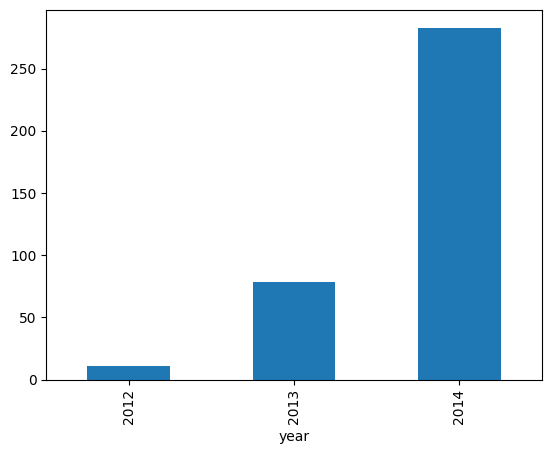

In [ ]:
df.groupby('year')['Count'].mean().plot.bar()

Traffic is more in year 2014.

<Axes: xlabel='month'>

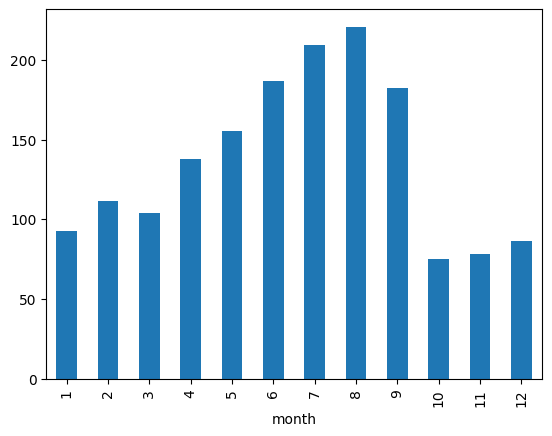

In [ ]:
df.groupby('month')['Count'].mean().plot.bar()

The maximum traffic is between the months of April to September.

<Axes: xlabel='year,month'>

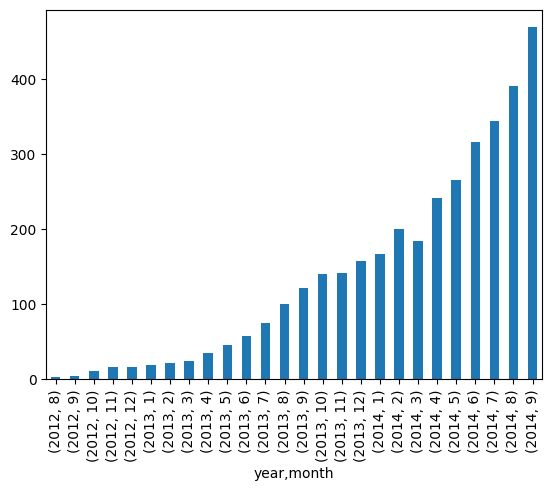

In [ ]:
df.groupby(['year', 'month'])['Count'].mean().plot.bar()

<Axes: xlabel='day'>

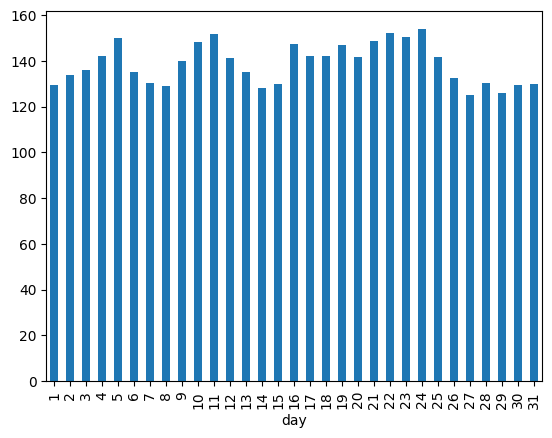

In [ ]:
df.groupby('day')['Count'].mean().plot.bar()

<Axes: xlabel='hour'>

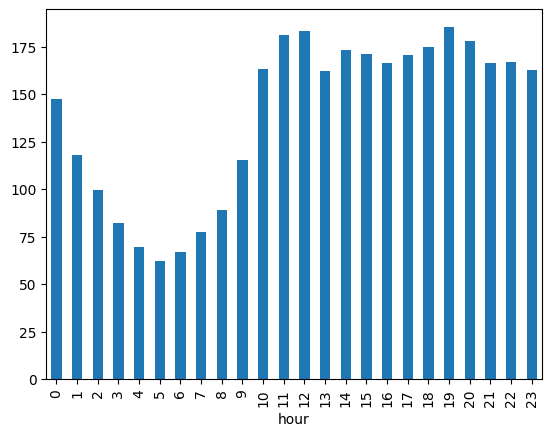

In [ ]:
df.groupby('hour')['Count'].mean().plot.bar()

peak traffic at 7 pm then decreasing trend till 5am

<Axes: xlabel='day of week'>

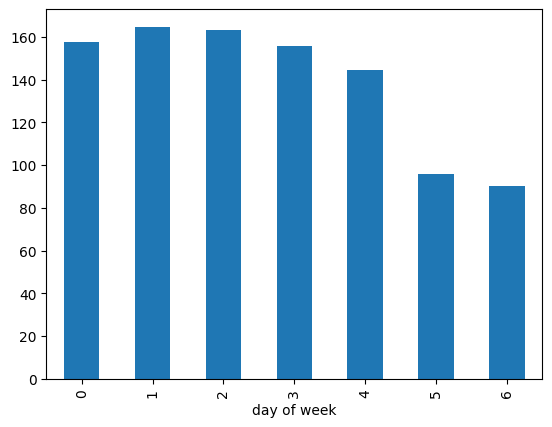

In [ ]:
df.groupby('day of week')['Count'].mean().plot.bar()

From this we can infer that Passenger count is less on Saturday and Sunday as compared to other days.

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# ADF Test - if the p-value < 0.05 - Data is stationary
result = adfuller(count_values)

print(f'ADF Statistic: {result[0]}')  # ADF Statistic
print(f'p-value: {result[1]}')         # p-value
print(f'n_lags: {result[2]}')          # Number of lags used in the regression

if result[1] > 0.05:
    print("The series is not stationary")
else:
    print("The series is stationary")


ADF Statistic: -4.456560536856827
p-value: 0.00023540466467665005
n_lags: 45
The series is stationary


In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf


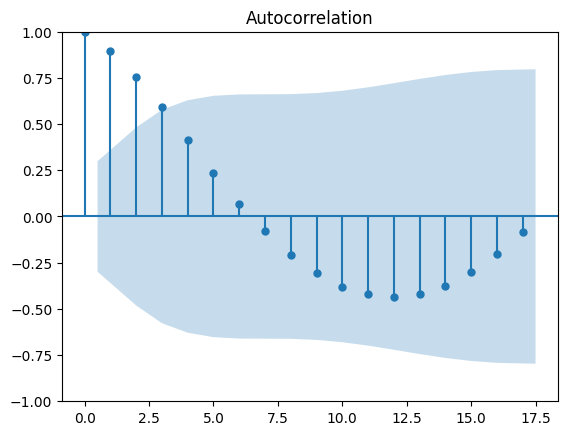

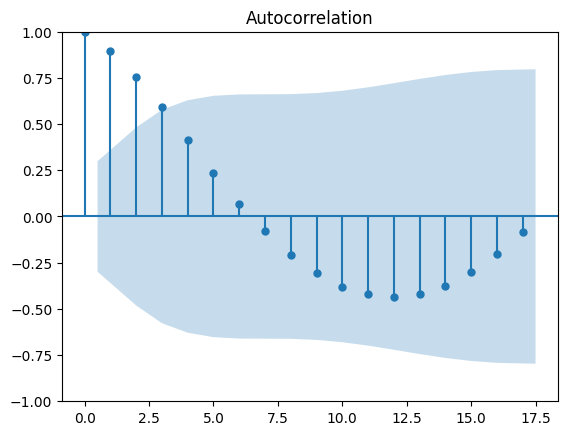

In [ ]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# Calculate the ACF
acf_plot = acf(count_values.dropna())

# Plot the ACF
plot_acf(acf_plot)


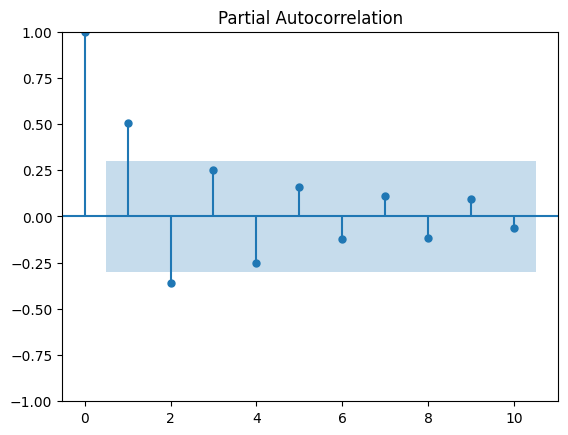

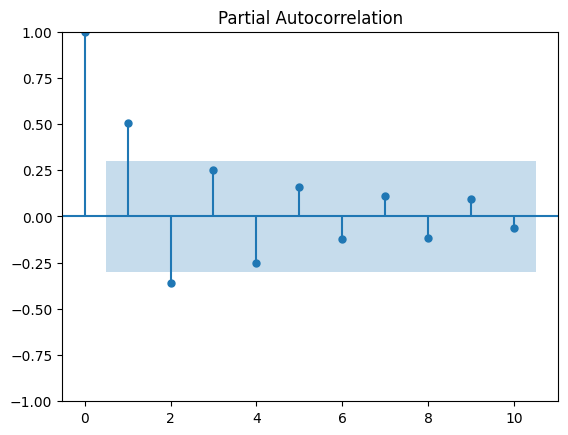

In [ ]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

# Extract the 'Count' column from the DataFrame
count_values = df['Count']

# Calculate the PACF
pacf_plot = pacf(count_values.dropna())

# Plot the PACF
plot_pacf(pacf_plot, lags=10)


In [ ]:
# Splitting the train and test data

In [ ]:
train=df.iloc[:120]['Count']
test=df.iloc[120:]['Count']

In [ ]:
# impoting the model
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# fitting the model
model = ARIMA(train, order  =(1,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [ ]:
# Loading the test data for prediction
test_df = pd.read_csv('Test_0qrQsBZ.csv')
test_df.shape


(18679, 2)

In [ ]:
test_df.head()

,ID,Count
0,18288,2
1,18289,8
2,18290,4
3,18291,2
4,18292,4


In [ ]:
# Make predictions on the 'test' dataset
predictions = model_fit.predict(start=len(test), end=len(test) + len(test) - 1, dynamic=True, typ='levels')

# Add the predictions to the 'test' DataFrame
test['predictions'] = predictions


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
<ipython-input-41-bdec412719e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = predictions


In [ ]:
test['predictions']

2014-09-21 00:00:00    2.495794
2014-09-21 01:00:00    2.495794
2014-09-21 02:00:00    2.495794
2014-09-21 03:00:00    2.495794
2014-09-21 04:00:00    2.495794
                         ...   
2016-10-16 19:00:00    2.495794
2016-10-16 20:00:00    2.495794
2016-10-16 21:00:00    2.495794
2016-10-16 22:00:00    2.495794
2016-10-16 23:00:00    2.495794
Freq: H, Name: predicted_mean, Length: 18168, dtype: float64

In [ ]:

# save the CSV file
output_csv_file = 'predicted_valuees.csv'

# Save the 'test' DataFrame with predictions to a CSV file
test.to_csv(output_csv_file, index=False)


In [ ]:
df1 = pd.read_csv('/content/predicted_valuees.csv')

In [ ]:
df1.head()

,Count
0,2
1,8
2,4
3,2
4,4
